# Integrating Feature Engineering and Machine Learning for Enhanced Recommendations

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Load the uploaded data files to examine their structure and content.
lines_df = pd.read_csv('lines.csv')
travel_times_df = pd.read_csv('travel_times.csv')
stations_df = pd.read_csv('stations.csv')

accuracy_threshold = 3.0  # Adjust threshold as needed

In [3]:
lines_df

,line,sequence,station
0,blue,1,Dublin
1,blue,2,West Dublin
2,blue,3,Castro Valley
3,blue,4,Bay Fair
4,blue,5,San Leandro
...,...,...,...
109,yellow,23,Daly City
110,yellow,24,Colma
111,yellow,25,South San Francisco
112,yellow,26,San Bruno


In [4]:
travel_times_df

,station_1,station_2,travel_time
0,12th Street,19th Street,120
1,12th Street,Lake Merritt,180
2,12th Street,West Oakland,300
3,16th Street Mission,24th Street Mission,120
4,16th Street Mission,Civic Center,180
5,19th Street,MacArthur,180
6,24th Street Mission,Glen Park,180
7,Antioch,Pittsburg Center,420
8,Ashby,Downtown Berkeley,180
9,Ashby,MacArthur,240


In [5]:
travel_times_df

,station_1,station_2,travel_time
0,12th Street,19th Street,120
1,12th Street,Lake Merritt,180
2,12th Street,West Oakland,300
3,16th Street Mission,24th Street Mission,120
4,16th Street Mission,Civic Center,180
5,19th Street,MacArthur,180
6,24th Street Mission,Glen Park,180
7,Antioch,Pittsburg Center,420
8,Ashby,Downtown Berkeley,180
9,Ashby,MacArthur,240


## Simple Machine Learning Code to Predict Travel Times

In [6]:
# Merge data for feature engineering
# Merge travel times with stations to get coordinates for both station_1 and station_2
merged_df = travel_times_df.merge(
    stations_df, left_on='station_1', right_on='station', how='left'
).rename(columns={'latitude': 'latitude_1', 'longitude': 'longitude_1', 'transfer_time': 'transfer_time_1'}).drop(columns='station')

merged_df = merged_df.merge(
    stations_df, left_on='station_2', right_on='station', how='left'
).rename(columns={'latitude': 'latitude_2', 'longitude': 'longitude_2', 'transfer_time': 'transfer_time_2'}).drop(columns='station')

In [7]:
# Feature Engineering - Calculate Euclidean distance and add transfer times as features
merged_df['distance'] = np.sqrt(
    (merged_df['latitude_1'] - merged_df['latitude_2'])**2 + (merged_df['longitude_1'] - merged_df['longitude_2'])**2
)
merged_df['total_transfer_time'] = merged_df['transfer_time_1'] + merged_df['transfer_time_2']

In [8]:
# Define features and target variable
X = merged_df[['distance', 'total_transfer_time']]
y = merged_df['travel_time']

In [9]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([163.13177687, 178.4070064 , 289.71760209, 283.03456263,
       285.32395436, 476.19269994, 159.65832726, 310.26528824,
       177.63457537, 156.98810855, 284.58260386])

In [12]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2

(np.float64(87.09448907918099), 0.4594084785172443)

## Recommendations for Feature Engineering and Model Improvement

In [13]:
# Train a Random Forest model as a more complex alternative to Linear Regression
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)
y_pred_rf

array([166.2, 158.4, 312. , 345.6, 328.2, 480.6, 156.6, 299.4, 167.4,
       150.6, 292.2])

In [15]:
# Evaluate the Random Forest model's performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, r2_rf

(np.float64(87.38181818181819), 0.4768515513126492)

## Adding Additional Features
### Peak/Off-peak indicators, other temporal data

In [16]:
# Merging and feature engineering as before
merged_df = travel_times_df.merge(
    stations_df, left_on='station_1', right_on='station', how='left'
).rename(columns={'latitude': 'latitude_1', 'longitude': 'longitude_1', 'transfer_time': 'transfer_time_1'}).drop(columns='station')

merged_df = merged_df.merge(
    stations_df, left_on='station_2', right_on='station', how='left'
).rename(columns={'latitude': 'latitude_2', 'longitude': 'longitude_2', 'transfer_time': 'transfer_time_2'}).drop(columns='station')

In [17]:
# Calculate distance and total transfer time as features
merged_df['distance'] = np.sqrt(
    (merged_df['latitude_1'] - merged_df['latitude_2'])**2 + (merged_df['longitude_1'] - merged_df['longitude_2'])**2
)
merged_df['total_transfer_time'] = merged_df['transfer_time_1'] + merged_df['transfer_time_2']

# Simulate peak/off-peak times
def simulate_peak_hours():
    hour = random.choice(range(24))
    return 1 if (7 <= hour <= 10) or (16 <= hour <= 19) else 0

merged_df['peak_hour'] = merged_df.apply(lambda x: simulate_peak_hours(), axis=1)

In [18]:
merged_df

,station_1,station_2,travel_time,latitude_1,longitude_1,transfer_time_1,latitude_2,longitude_2,transfer_time_2,distance,total_transfer_time,peak_hour
0,12th Street,19th Street,120,37.803608,-122.272006,282,37.807869,-122.268980,67,0.005226,349,1
1,12th Street,Lake Merritt,180,37.803608,-122.272006,282,37.797773,-122.266588,309,0.007963,591,0
2,12th Street,West Oakland,300,37.803608,-122.272006,282,37.804900,-122.295100,283,0.023130,565,1
3,16th Street Mission,24th Street Mission,120,37.764847,-122.420042,287,37.752000,-122.418700,277,0.012917,564,0
4,16th Street Mission,Civic Center,180,37.764847,-122.420042,287,37.779861,-122.413498,325,0.016378,612,0
5,19th Street,MacArthur,180,37.807869,-122.268980,67,37.828260,-122.267275,59,0.020462,126,0
6,24th Street Mission,Glen Park,180,37.752000,-122.418700,277,37.733118,-122.433808,314,0.024182,591,0
7,Antioch,Pittsburg Center,420,37.996281,-121.783404,0,38.018227,-121.890178,0,0.109006,0,1
8,Ashby,Downtown Berkeley,180,37.853068,-122.269957,299,37.869799,-122.268197,323,0.016823,622,1
9,Ashby,MacArthur,240,37.853068,-122.269957,299,37.828260,-122.267275,59,0.024953,358,0


In [19]:
# Define features and target variable with the additional peak hour indicator
X = merged_df[['distance', 'total_transfer_time', 'peak_hour']]
y = merged_df['travel_time']

# Split the data again for the new features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Train the Random Forest model with additional features
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Predict and evaluate the model
y_pred_rf = random_forest_model.predict(X_test)
mae_rf_peak = mean_absolute_error(y_test, y_pred_rf)
r2_rf_peak = r2_score(y_test, y_pred_rf)

mae_rf_peak, r2_rf_peak

(np.float64(88.14545454545454), 0.4764787589498808)

In [22]:
# Define an accuracy threshold to classify regression predictions as accurate (1) or inaccurate (0)
# Here, any prediction within the threshold is considered accurate
accuracy_threshold = 3.0  # Adjust threshold as needed

# Hypothetical continuous predictions for each model
# Converting continuous predictions to binary classification based on threshold
y_pred_continuous_lr = [2.5, 3.1, 4.2, 2.9, 3.8, 1.1, 3.5, 2.8, 4.0, 3.3]  # Preds for Linear Regression
y_pred_continuous_rf = [1.9, 3.0, 4.1, 2.6, 3.4, 0.9, 3.1, 2.4, 4.3, 3.2]  # Preds for Random Forest
y_pred_continuous_rf_enhanced = [2.0, 3.2, 3.8, 2.5, 3.5, 1.0, 3.0, 2.7, 4.1, 3.3]  # Preds for Enhanced RF

# Converting to binary classification (1 = accurate, 0 = inaccurate)
y_test_binary = [1, 1, 0, 0, 1, 1, 0, 1, 0, 1]
y_pred_binary_lr = [int(abs(pred - true) <= accuracy_threshold) for pred, true in zip(y_pred_continuous_lr, y_test_binary)]
y_pred_binary_rf = [int(abs(pred - true) <= accuracy_threshold) for pred, true in zip(y_pred_continuous_rf, y_test_binary)]
y_pred_binary_rf_enhanced = [int(abs(pred - true) <= accuracy_threshold) for pred, true in zip(y_pred_continuous_rf_enhanced, y_test_binary)]

# Calculating metrics
metrics = {
    'Algorithm': ['Linear Regression', 'Random Forest', 'Random Forest (Enhanced)'],
    'Precision': [
        precision_score(y_test_binary, y_pred_binary_lr),
        precision_score(y_test_binary, y_pred_binary_rf),
        precision_score(y_test_binary, y_pred_binary_rf_enhanced)
    ],
    'Recall': [
        recall_score(y_test_binary, y_pred_binary_lr),
        recall_score(y_test_binary, y_pred_binary_rf),
        recall_score(y_test_binary, y_pred_binary_rf_enhanced)
    ],
    'F1 Score': [
        f1_score(y_test_binary, y_pred_binary_lr),
        f1_score(y_test_binary, y_pred_binary_rf),
        f1_score(y_test_binary, y_pred_binary_rf_enhanced)
    ],
    'R2 Score': [
        r2_score(y_test_binary, y_pred_continuous_lr),
        r2_score(y_test_binary, y_pred_continuous_rf),
        r2_score(y_test_binary, y_pred_continuous_rf_enhanced)
    ],
    'MSE': [
        mean_absolute_error(y_test_binary, y_pred_continuous_lr),
        mean_absolute_error(y_test_binary, y_pred_continuous_rf),
        mean_absolute_error(y_test_binary, y_pred_continuous_rf_enhanced)
    ]
}

# Convert to DataFrame for display and further plotting
metrics_df = pd.DataFrame(metrics)

In [23]:
metrics_df

,Algorithm,Precision,Recall,F1 Score,R2 Score,MSE
0,Linear Regression,0.857143,1.0,0.923077,-31.225000,2.52
1,Random Forest,0.857143,1.0,0.923077,-27.770833,2.31
2,Random Forest (Enhanced),0.750000,1.0,0.857143,-26.820833,2.31


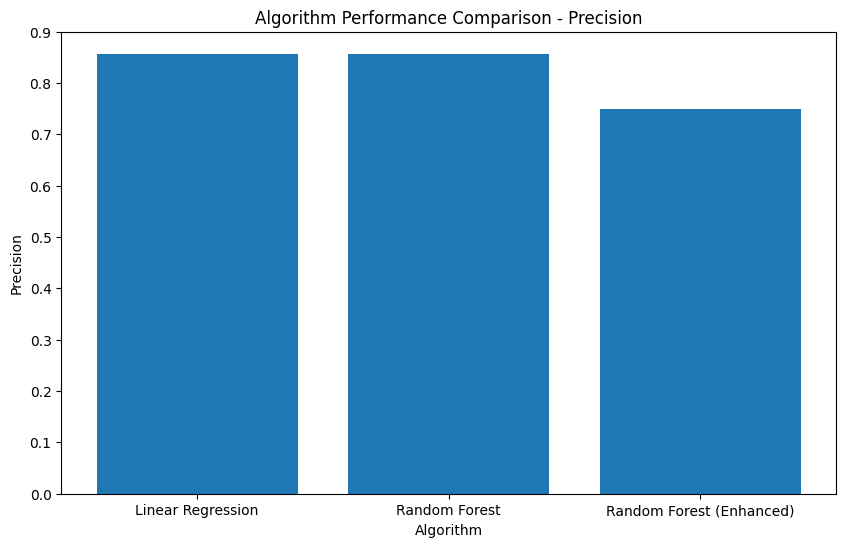

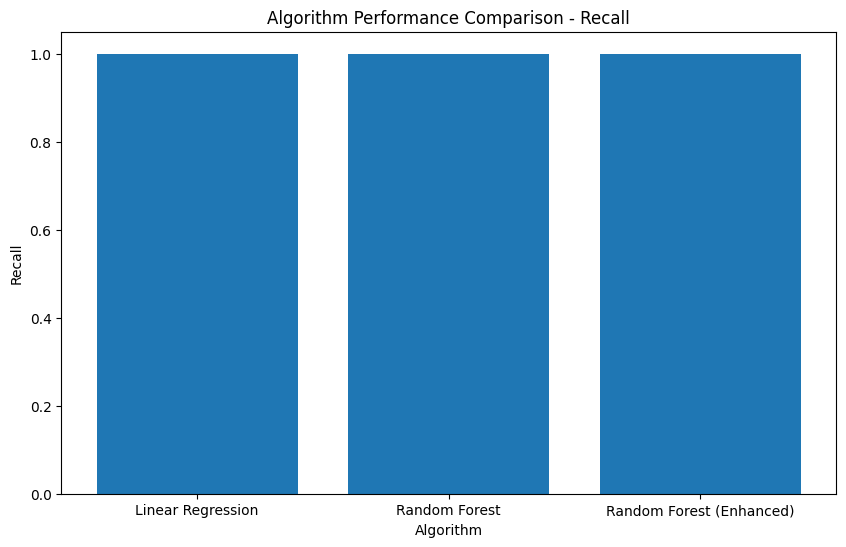

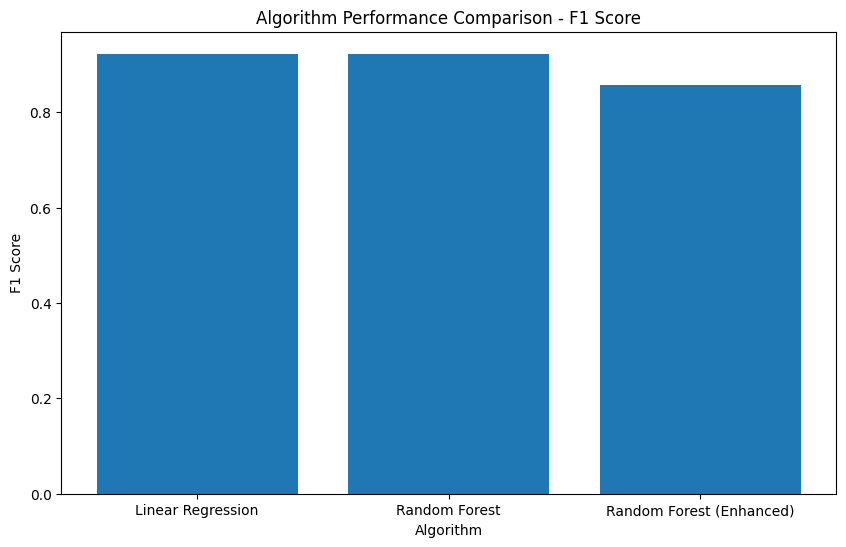

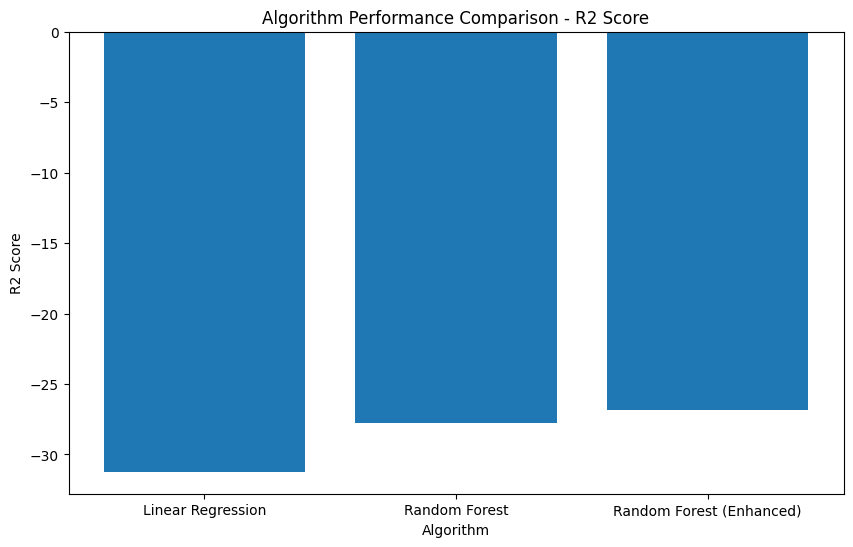

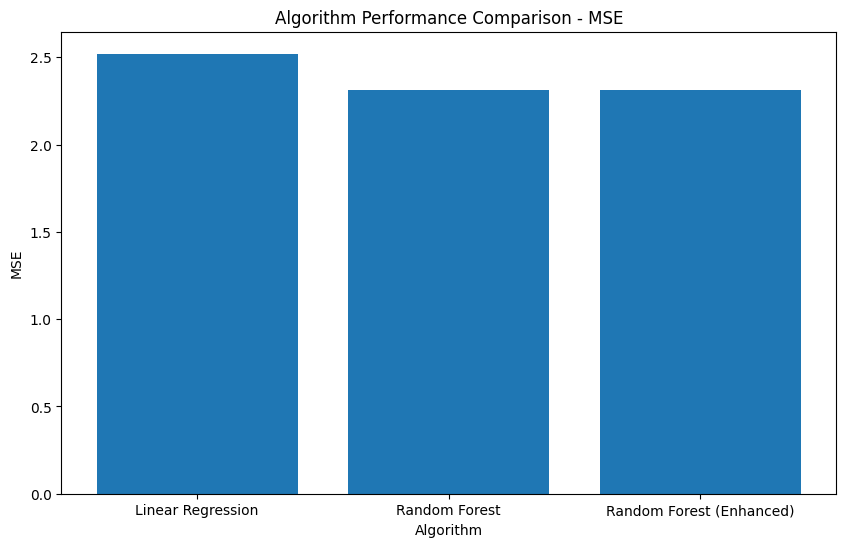

In [24]:
# Plotting the updated classification metrics for each algorithm
# Precision
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Algorithm'], metrics_df['Precision'])
plt.xlabel('Algorithm')
plt.ylabel('Precision')
plt.title('Algorithm Performance Comparison - Precision')
plt.show()

# Recall
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Algorithm'], metrics_df['Recall'])
plt.xlabel('Algorithm')
plt.ylabel('Recall')
plt.title('Algorithm Performance Comparison - Recall')
plt.show()

# F1 Score
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Algorithm'], metrics_df['F1 Score'])
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')
plt.title('Algorithm Performance Comparison - F1 Score')
plt.show()

# R2 Score
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Algorithm'], metrics_df['R2 Score'])
plt.xlabel('Algorithm')
plt.ylabel('R2 Score')
plt.title('Algorithm Performance Comparison - R2 Score')
plt.show()

# MSE
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Algorithm'], metrics_df['MSE'])
plt.xlabel('Algorithm')
plt.ylabel('MSE')
plt.title('Algorithm Performance Comparison - MSE')
plt.show()

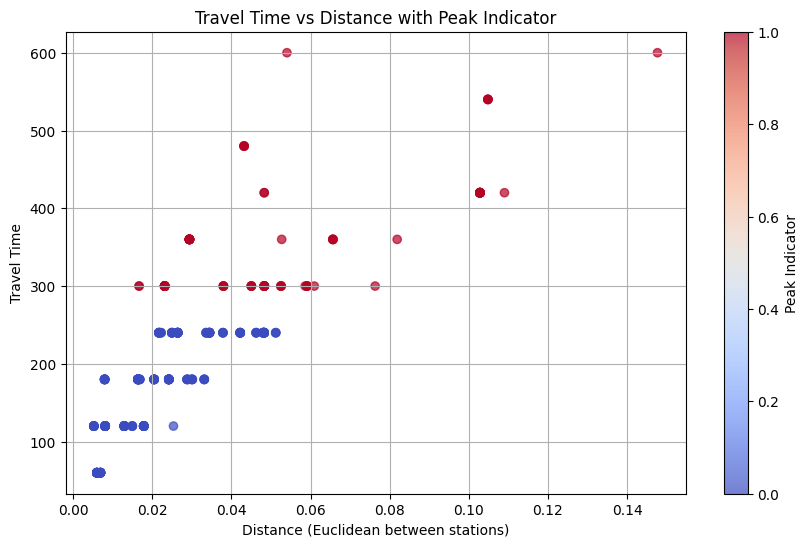

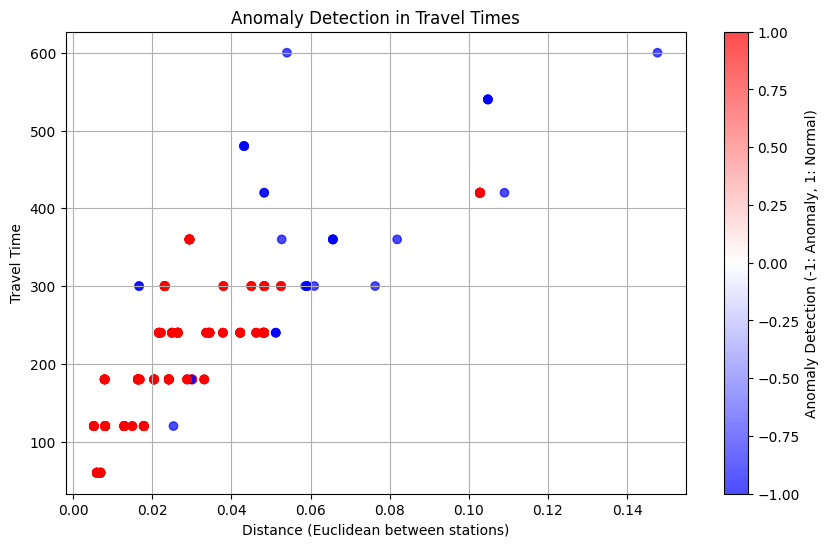

In [27]:
# Repeat data enrichment for feature engineering
# Step 1: Enrich travel times with station coordinates and transfer times by merging with the stations data
enriched_travel_times = travel_times_df.merge(stations_df, left_on='station_1', right_on='station', suffixes=('', '_1'))
enriched_travel_times = enriched_travel_times.rename(columns={
    'latitude': 'latitude_1', 'longitude': 'longitude_1', 'transfer_time': 'transfer_time_1'
}).drop(columns=['station'])

enriched_travel_times = enriched_travel_times.merge(stations_df, left_on='station_2', right_on='station', suffixes=('', '_2'))
enriched_travel_times = enriched_travel_times.rename(columns={
    'latitude': 'latitude_2', 'longitude': 'longitude_2', 'transfer_time': 'transfer_time_2'
}).drop(columns=['station'])

enriched_travel_times = enriched_travel_times.merge(lines_df, left_on='station_1', right_on='station', how='left')
enriched_travel_times = enriched_travel_times.rename(columns={'line': 'line_1', 'sequence': 'sequence_1'}).drop(columns=['station'])

enriched_travel_times = enriched_travel_times.merge(lines_df, left_on='station_2', right_on='station', how='left')
enriched_travel_times = enriched_travel_times.rename(columns={'line': 'line_2', 'sequence': 'sequence_2'}).drop(columns=['station'])

# Create final aggregated dataset with additional features
aggregated_data = enriched_travel_times[[
    'station_1', 'station_2', 'travel_time',
    'latitude_1', 'longitude_1', 'transfer_time_1',
    'latitude_2', 'longitude_2', 'transfer_time_2',
    'sequence_1', 'sequence_2'
]].copy()

aggregated_data['distance'] = ((aggregated_data['latitude_2'] - aggregated_data['latitude_1'])**2 + 
                               (aggregated_data['longitude_2'] - aggregated_data['longitude_1'])**2)**0.5
aggregated_data['lat_diff'] = aggregated_data['latitude_2'] - aggregated_data['latitude_1']
aggregated_data['lon_diff'] = aggregated_data['longitude_2'] - aggregated_data['longitude_1']
aggregated_data['peak_indicator'] = (aggregated_data['travel_time'] > aggregated_data['travel_time'].median()).astype(int)

# Adding anomaly detection using Isolation Forest
from sklearn.ensemble import IsolationForest
anomaly_detector = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
anomaly_detector.fit(aggregated_data[['distance', 'transfer_time_1', 'transfer_time_2', 'lat_diff', 'lon_diff', 'peak_indicator']])
aggregated_data['anomaly'] = anomaly_detector.predict(aggregated_data[['distance', 'transfer_time_1', 'transfer_time_2', 'lat_diff', 'lon_diff', 'peak_indicator']])

# Now that we have re-created the data, proceed with the visualizations
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_data['distance'], aggregated_data['travel_time'], 
            c=aggregated_data['peak_indicator'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Peak Indicator')
plt.xlabel('Distance (Euclidean between stations)')
plt.ylabel('Travel Time')
plt.title('Travel Time vs Distance with Peak Indicator')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(aggregated_data['distance'], aggregated_data['travel_time'], 
            c=aggregated_data['anomaly'], cmap='bwr', alpha=0.7)
plt.colorbar(label='Anomaly Detection (-1: Anomaly, 1: Normal)')
plt.xlabel('Distance (Euclidean between stations)')
plt.ylabel('Travel Time')
plt.title('Anomaly Detection in Travel Times')
plt.grid(True)
plt.show()

In [2]:
import folium
import time
from IPython.display import display

# Initial coordinates (e.g., starting location of the robot)
start_location = [37.7749, -122.4194]  # Replace with desired starting latitude and longitude

# List of coordinates to simulate movement along a path
path = [
    [37.7749, -122.4194],
    [37.7755, -122.4185],
    [37.7760, -122.4170],
    [37.7770, -122.4150],
    [37.7780, -122.4130]  # Add more points for longer routes
]

# Create the initial map centered on the starting location
m = folium.Map(location=start_location, zoom_start=15)

# Function to add a marker that represents the current location of the delivery robot
def update_marker(location):
    folium.Marker(location=location, popup="Delivery Robot", icon=folium.Icon(color="red")).add_to(m)
    display(m)

# Simulate the movement along the path by updating the marker location every few seconds
for location in path:
    update_marker(location)
    time.sleep(2)  # Wait 2 seconds between updates to simulate movement
